In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import statsmodels as sm
import xlwings as xw
import openpyxl
from fredapi import Fred
from datetime import datetime, timedelta
from tqdm import tqdm
import time
import investpy as inv

In [2]:
class fred:
    def __init__(self, api_key, dic=None):
        if dic == None:
            self.column_dict = dict()
        else:
            self.column_dict = dic

        self.now = datetime.now().strftime('%Y-%m-%d')
        self.api_key = api_key
        self.start_date = '2000-01-01'
        self.end_date = self.now
        self.data = pd.DataFrame(self.column_dict)
        self.frd = Fred(api_key=self.api_key)

    def set_start_end_date(self, start_date, end_date):
        self.start_date = start_date
        self.end_date = end_date

    def init_columns(self, dic=None, start_date = None):
        if start_date != None:
            self.start_date = start_date
        if dic == None and self.column_dict == dict():
            print('empty data dict!')
        elif dic == None and self.column_dict != dict():
            self.crawling()
        else:
            self.column_dict = dic
            self.crawling()

    def append_columns(self, column_name, key):
        self.column_dict[column_name] = key
        for i in tqdm(range(1), decs='Update'):
            self.data[column_name] = self.frd.get_series(key, self.start_date, self.end_date)

    def del_columns(self, column_name):
        del self.column_dict[column_name]
        self.data = self.data.drop([column_name], axis=1)

    def crawling(self):
        self.data = pd.DataFrame()
        key = [key for key, value in self.column_dict.items()]
        value = [value for key, value in self.column_dict.items()]

        for i in tqdm(range(len(value)), desc='Crawling'):
            self.data[key[i]] = self.frd.get_series(value[i], self.start_date, self.end_date)

    def get_dataframe(self):
        return self.data

    def update(self):
        pd_tmp = pd.DataFrame()
        last_update = datetime.strftime(self.data.index[-1]+timedelta(days=1),'%Y-%m-%d')
        self.now = datetime.now().strftime('%Y-%m-%d')
        self.end_date = self.now

        key = [key for key, value in self.column_dict.items()]
        value = [value for key, value in self.column_dict.items()]

        for i in tqdm(range(len(value)), desc='Update'):
            pd_tmp[key[i]] = self.frd.get_series(value[i], last_update, self.end_date)

        self.data = pd.concat([self.data, pd_tmp])
        

In [3]:
f = fred(api_key='bb325f37d681f25b180da9a82f16f9e0')
f.init_columns({'T10Y':'DGS10', 'T2Y': 'DGS2', 'T30M': 'DGS3MO', 'S&P500':'SP500'})
#f.get_dataframe().plot(subplots=True, figsize=(12,6))

Crawling: 100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

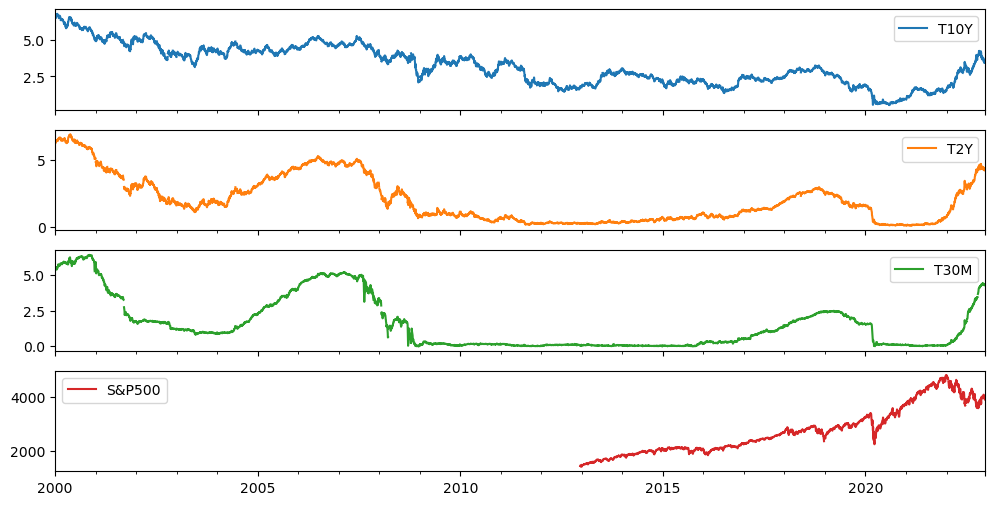

In [4]:
f.get_dataframe().plot(subplots=True, figsize=(12,6))

In [5]:
"""import requests
from bs4 import BeautifulSoup
import re

zip = []
idx = 105767
max_itm = 50
itm = 0

for i in tqdm(range(itm,max_itm)):
    url = f"https://www.marketwatch.com/investing/index/{idx}/downloaddatapartial?partial=true&index={i}&countryCode=xx&iso&startDate=11%2F04%2F1971%2000%3A00%3A00&endDate=12%2F16%2F2022%2000%3A00%3A00&frequency=P1D&downloadPartial=true&csvDownload=false&newDates=false"

    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    d = soup.select('td.overflow__cell>div.cell__content')
    dd = [re.sub(r'[^0-9,.]',"",str(i))for i in d]

    for i in range(0,len(dd),6):
        zip.append((dd[i],dd[i+5]))

    time.sleep(2)
    pd.DataFrame(zip)"""

'import requests\nfrom bs4 import BeautifulSoup\nimport re\n\nzip = []\nidx = 105767\nmax_itm = 50\nitm = 0\n\nfor i in tqdm(range(itm,max_itm)):\n    url = f"https://www.marketwatch.com/investing/index/{idx}/downloaddatapartial?partial=true&index={i}&countryCode=xx&iso&startDate=11%2F04%2F1971%2000%3A00%3A00&endDate=12%2F16%2F2022%2000%3A00%3A00&frequency=P1D&downloadPartial=true&csvDownload=false&newDates=false"\n\n    response = requests.get(url)\n    soup = BeautifulSoup(response.content, \'lxml\')\n    d = soup.select(\'td.overflow__cell>div.cell__content\')\n    dd = [re.sub(r\'[^0-9,.]\',"",str(i))for i in d]\n\n    for i in range(0,len(dd),6):\n        zip.append((dd[i],dd[i+5]))\n\n    time.sleep(2)\n    pd.DataFrame(zip)'

In [ ]:
class FRED(DataMachine):
    def __init__(self, apiKey, contents, dataFrame=None):
        super().__init__()
        self._apiKey = apiKey
        self._frd = Fred(api_key=apiKey)
        self.contents(contents)

        if dataFrame != None:
            self._dataFrame = dataFrame

    def parser(self):
        key = [key for key in self._contents.keys()]
        value = [value for value in self._contents.values()]

        # update
        if self._dataFrame != None:
            tmpFrame = pd.DataFrame()
            lastUpdate = datetime.strftime(self._dataFrame.index[-1]+timedelta(days=1),'%Y-%m-%d')
            for i in tqdm(range(len(value)), desc='Update'):
                tmpFrame[key[i]] = self._frd.get_series(value[i], lastUpdate, self._endDate)
            self._dataFrame = pd.concat([self._dataFrame, tmpFrame])

        #parsing
        else:
            for i in tqdm(range(len(value)), desc='Crawling'):
                self._dataFrame[key[i]] = self._frd.get_series(value[i], self._startDate, self._endDate)

    @property
    def dataFrame(self):
        return self._dataFrame


In [ ]:
from pykrx.stock

pykrx.